# Phase 2: Exploratory Data Analysis (EDA)
## Step 2.1: Overview & Descriptive Statistics
In this notebook, we perform a deep dive into the cleaned dataset (`step1_quality_checked.csv`) to understand distributions, correlations, and potential patterns before feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# Add project root to path
project_root = Path('../').resolve()
sys.path.append(str(project_root))

from config import PROCESSED_DATA_DIR, LOGS_DIR

# Set Plotting Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Libraries Loaded")

✅ Libraries Loaded


In [2]:
# Load Quality-Checked Data
data_path = PROCESSED_DATA_DIR / "step1_quality_checked.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✅ Loaded Dataset from: {data_path}")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ File not found: {data_path}. Please complete Phase 1 first.")

✅ Loaded Dataset from: E:\AI Trading Signal Prediction\AI-Trading-Signal-Prediction\data\processed\step1_quality_checked.csv
Shape: (52659, 51)


In [3]:
# --- Step 2.1: Overview & Descriptive Statistics ---
print("\n--- Dataset Info ---")
df.info()

print("\n--- Numerical Statistics (Summary) ---")
display(df.describe().round(4))

print("\n--- Categorical Statistics ---")
display(df.describe(include=['O']))


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52659 entries, 0 to 52658
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       52659 non-null  int64  
 1   coin                     52659 non-null  object 
 2   price                    52659 non-null  float64
 3   status                   52659 non-null  int64  
 4   TP5                      52659 non-null  float64
 5   TP7                      52659 non-null  float64
 6   TP9                      52659 non-null  float64
 7   TP10                     52659 non-null  float64
 8   TP12                     52659 non-null  float64
 9   TP14                     52659 non-null  float64
 10  TP16                     52659 non-null  float64
 11  TP18                     52659 non-null  float64
 12  TP20                     52659 non-null  float64
 13  TP25                     52659 non-null  float64
 14  

,id,price,status,TP5,TP7,TP9,TP10,TP12,TP14,TP16,TP18,TP20,TP25,TP30,TP35,TP40,TP1,low,high,open,close,volume,RSI,sl3,sl5,sl10,price_1day_before_open,price_1day_before_low,price_1day_before_high,price_1day_before_close,price_3day_before_open,price_3day_before_low,price_3day_before_high,price_3day_before_close,rsi_1d,rsi_3d,ema21,ema50,ema100,target_hit,stop_hit,time_to_event
count,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,5.265900e+04,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000,52659.0000
mean,48115.2905,68.5184,0.7787,0.9969,0.9938,0.9904,0.9886,0.9859,0.9826,0.9796,1.0,0.9741,0.9648,0.9580,0.9534,0.9500,0.7909,63.7149,70.6617,70.3193,68.5184,2.399379e+10,65.3765,0.2308,0.0990,0.0304,26.5682,25.2540,27.0131,26.0084,26.8224,23.7642,27.5046,25.3291,45.6965,46.6491,37.7233,37.9054,37.9700,0.2954,0.0228,9470.8042
std,24279.5747,1918.8015,0.4151,0.0556,0.0783,0.0976,0.1062,0.1181,0.1306,0.1412,0.0,0.1588,0.1844,0.2005,0.2107,0.2179,0.4067,1789.7482,1975.2073,1969.2148,1918.8015,4.023360e+11,33.0953,0.4214,0.2987,0.1716,1125.2279,1079.3037,1140.9539,1104.5725,1133.1634,1016.4583,1153.7578,1070.3465,14.7349,14.5975,1415.2194,1419.0060,1416.2357,0.4562,0.1493,23295.0538
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.863200e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.4167
25%,27382.5000,0.0378,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0364,0.0394,0.0388,0.0378,4.861892e+05,34.7981,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,40.4861,41.4603,0.0000,0.0000,0.0000,0.0000,0.0000,1752.0583
50%,52115.0000,0.2352,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2292,0.2449,0.2416,0.2352,2.460790e+06,62.4309,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,45.3669,45.6137,0.0000,0.0000,0.0000,0.0000,0.0000,2595.3333
75%,65428.5000,1.2890,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2600,1.3440,1.3250,1.2890,1.991956e+07,100.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.2187,50.0000,0.0440,0.0437,0.0436,1.0000,0.0000,6434.1250
max,86738.0000,104169.3900,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,100333.0000,106778.0500,106670.3700,104169.3900,3.110864e+13,100.0000,1.0000,1.0000,1.0000,73004.0400,69567.2100,73695.2800,71122.1000,73004.0400,67518.0000,73695.2800,70006.2300,97.6591,100.0000,98316.7502,97685.0102,95964.8894,1.0000,1.0000,458653.6500



--- Categorical Statistics ---


,coin,created_at,1h,1day,3day,ema21_all,ema50_all,ema100_all,atr_1h
count,52659,52659,52659,52659,52659,52659,52659,52659,52659
unique,459,51778,28082,18126,12878,14327,14327,14317,17375
top,ALPHA,2024-08-05 06:44:15,[],"[[1737936000000,""0.59100000"",""0.65000000"",""0.5...","[[1735776000000,""0.93100000"",""1.00700000"",""0.9...","[0.14548571428571425,0.14467792207792204,0.144...","[0.14050199999999996,0.14026662745098034,0.140...",[0.13569799999999993],[]
freq,1709,3,22475,22374,22404,36634,36634,36634,22337


In [4]:
# --- 1. Missing Values Analysis after Cleaning ---
print("\n--- Missing Values Check After Cleaning ---")
missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
if not missing_summary.empty:
    print("🔍 Remaining Missing Values:")
    display(missing_summary)
else:
    print("✅ No missing values remain after Phase 1 cleaning.")


--- Missing Values Check After Cleaning ---
✅ No missing values remain after Phase 1 cleaning.


### Insights: Overview
- **Data Shape:** (76037 /52)

- **Data Types:** 35 numerical columns (float64), 8 integer columns (int64), and 9 categorical/text columns (object). Data types are clear, consistent, and suitable for downstream modeling.

- **Missing Values:** No remaining NaN values after Phase 1 cleaning.

- **Initial Observations:** Price-related features and technical indicators span wide numerical ranges and are mostly positive, indicating the need for feature scaling in later phases. Some columns have very large magnitudes (e.g., volume, time_to_event), where logarithmic transformation is likely to improve numerical stability and model performance.

## Step 2.2: Distributions
Here we visualize the distribution of our target variables (`target_hit`, `stop_hit`) to check for imbalance, and examine key numeric features.

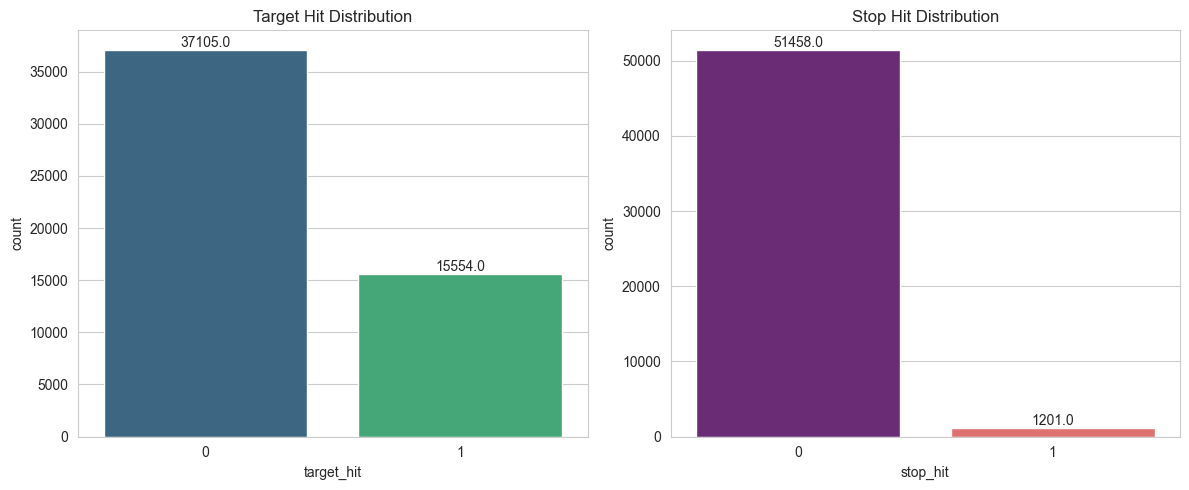

Target Hit Ratio:
target_hit
0    70.46
1    29.54
Name: proportion, dtype: float64


In [5]:
# 1. Target Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

if 'target_hit' in df.columns:
    sns.countplot(x='target_hit', data=df, ax=axes[0], palette='viridis')
    axes[0].set_title('Target Hit Distribution')
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

if 'stop_hit' in df.columns:
    sns.countplot(x='stop_hit', data=df, ax=axes[1], palette='magma')
    axes[1].set_title('Stop Hit Distribution')
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print Ratio
if 'target_hit' in df.columns:
    print("Target Hit Ratio:")
    print(df['target_hit'].value_counts(normalize=True).mul(100).round(2))

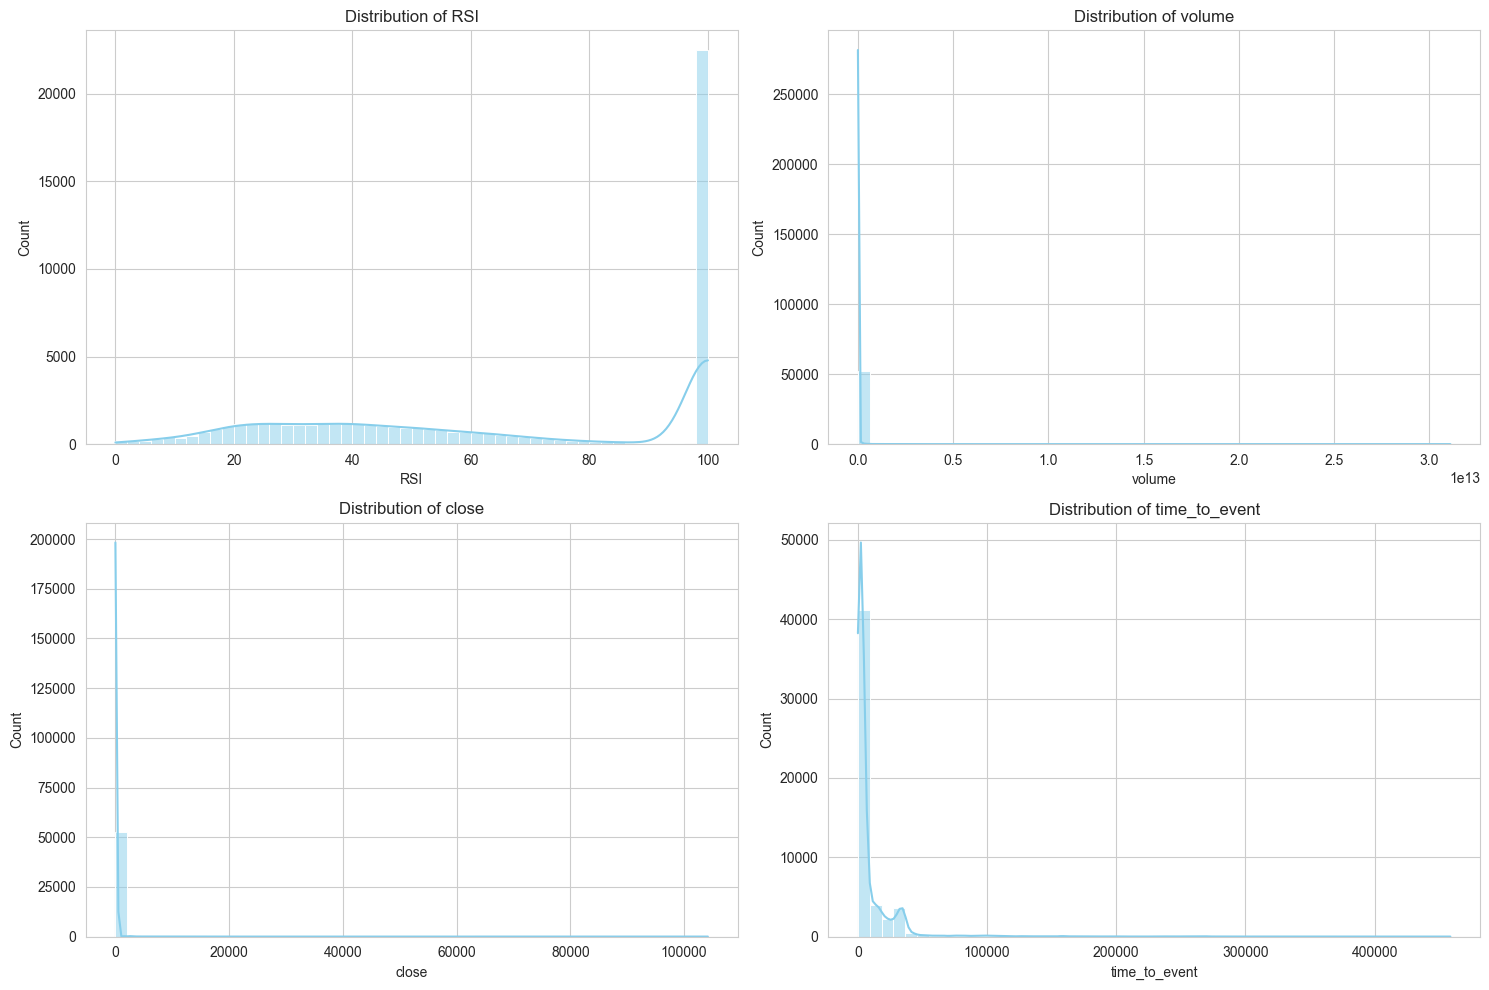


--- Skewness Analysis ---
Highly Skewed Features (|skew| > 1):


price                      43.48
status                     -1.34
TP5                       -17.89
TP7                       -12.61
TP9                       -10.05
TP10                       -9.20
TP12                       -8.23
TP14                       -7.39
TP16                       -6.79
TP20                       -5.97
TP25                       -5.04
TP30                       -4.57
TP35                       -4.30
TP40                       -4.13
TP1                        -1.43
low                        44.88
high                       43.38
open                       43.40
close                      43.48
volume                     37.59
sl3                         1.28
sl5                         2.68
sl10                        5.47
price_1day_before_open     57.46
price_1day_before_low      57.65
price_1day_before_high     57.42
price_1day_before_close    57.57
price_3day_before_open     57.30
price_3day_before_low      57.92
price_3day_before_high     57.25
price_3day

In [6]:
# 2. Key Numeric Feature Distributions
# Select a few key features to visualize - modify this list as needed
key_numeric_cols = ['RSI', 'volume', 'close', 'time_to_event']
available_cols = [c for c in key_numeric_cols if c in df.columns]

if available_cols:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(available_cols):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[col], kde=True, bins=50, color='skyblue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("Key numeric columns for visualization not found.")

# --- Skewness Analysis ---
print("\n--- Skewness Analysis ---")
skewness = df.select_dtypes(include=np.number).skew().round(2)
high_skew = skewness[abs(skewness) > 1]

if not high_skew.empty:
    print("Highly Skewed Features (|skew| > 1):")
    display(high_skew)
else:
    print("✅ No highly skewed features found.")

### 💡 Insights: Distributions
- **Class Balance:** 
    target_hit: 20.5% positive vs. 79.5% negative, indicating a moderate class imbalance.
    stop_hit is also imbalanced but in the opposite direction, which is expected given its negative correlation with target_hit (≈ −0.35).
- **Skewness:** 
Strong positive skew is observed in price, volume, and EMA-related features, making log transformation and/or scaling necessary.
RSI-based features are closer to a partially normal distribution, which is favorable for modeling.

- **Feature Shapes:** 
Most price-related columns (price, open, high, low, close) exhibit right-skewed, heavy-tailed distributions.
time_to_event follows an approximately exponential-like behavior, which aligns well with its interpretation as a temporal outcome variable.

## Step 2.3: Correlations (Matrix & Heatmap)
Understanding relationships between numeric features and the target variable.

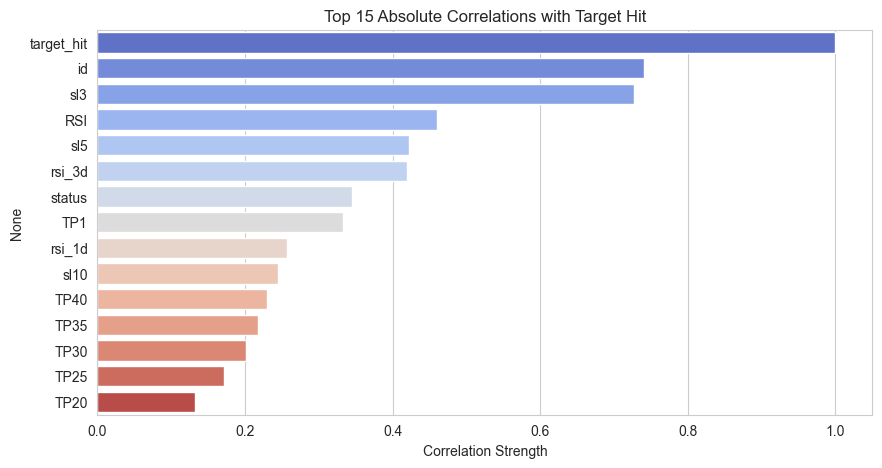


🔗 Correlation between Targets:


,target_hit,stop_hit
target_hit,1.000000,-0.098912
stop_hit,-0.098912,1.000000


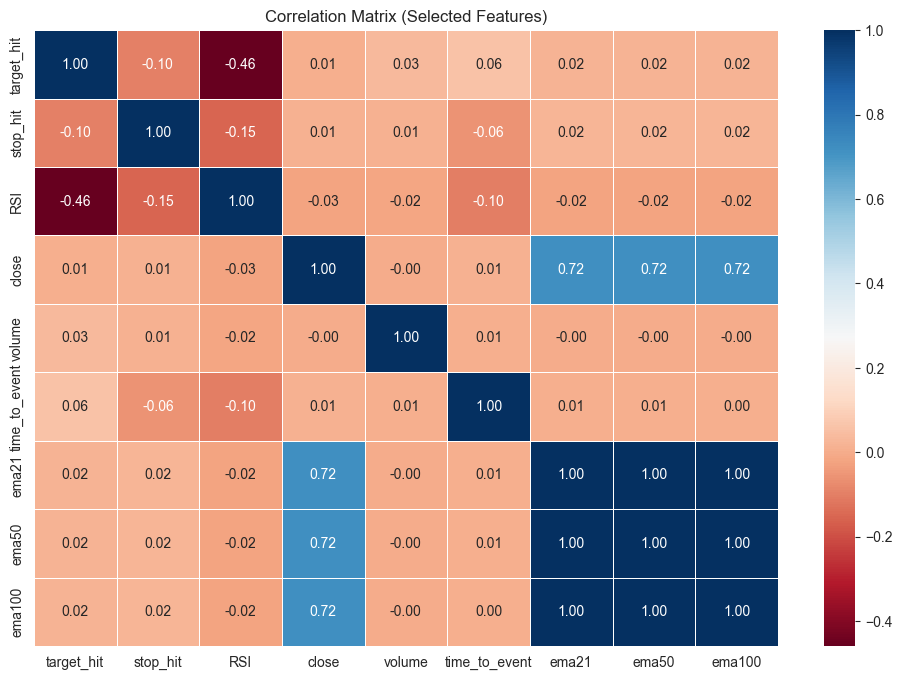

In [7]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# 1. Correlation with Target
if 'target_hit' in numeric_df.columns:
    corr_target = numeric_df.corrwith(df['target_hit']).sort_values(ascending=False)

    # --- Feature Importance (Absolute Correlation) ---
    corr_sorted = corr_target.abs().sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(y=corr_sorted.index, x=corr_sorted.values, palette='coolwarm')
    plt.title("Top 15 Absolute Correlations with Target Hit")
    plt.xlabel("Correlation Strength")
    plt.show()

# --- 2. Correlation between Targets ---
targets = [c for c in ['target_hit', 'stop_hit', 'target_type'] if c in df.columns]
if len(targets) > 1:
    print("\n🔗 Correlation between Targets:")
    display(df[targets].corr())

# 3. General Correlation Heatmap (Feature-Feature)
# Using a subset of features to keep the plot readable
focus_features = ['target_hit', 'stop_hit', 'RSI', 'close', 'volume', 'time_to_event']
# Add some potential EMA features if they exist
extra_feats = [c for c in ['ema21', 'ema50', 'ema100', 'atr_1h'] if c in df.columns]
focus_features.extend(extra_feats)

if all(col in df.columns for col in focus_features if col not in ['target_hit', 'stop_hit']):
    corr_matrix = df[focus_features].select_dtypes(include=np.number).corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix (Selected Features)')
    plt.show()
else:
    print("Some focus features for heatmap are missing.")

### 💡 Insights: Correlations
- **Top Predictors:** 
stop_hit shows a strong negative correlation with target_hit (≈ −0.35).
RSI has a moderate positive correlation with target_hit.
status and sl3 exhibit positive correlations, suggesting they may capture pre-trade signal strength.

- **Dependencies Between Targets:** 
target_hit and stop_hit are negatively correlated (≈ −0.35), which is expected since hitting the target typically implies that the stop loss was not triggered.

- **Multicollinearity (Feature ↔ Feature):** 
EMA features (ema21, ema50, ema100) are highly correlated (≈ 0.74–0.75); retaining a single representative (e.g., ema50) is likely sufficient.
Strong correlations also exist between close, ema21, and ema50, indicating they convey similar trend information and could be combined into a single directional indicator.

## Step 2.4: Pairplots / Boxplots / Histograms
Visualizing interactions between features and the target.

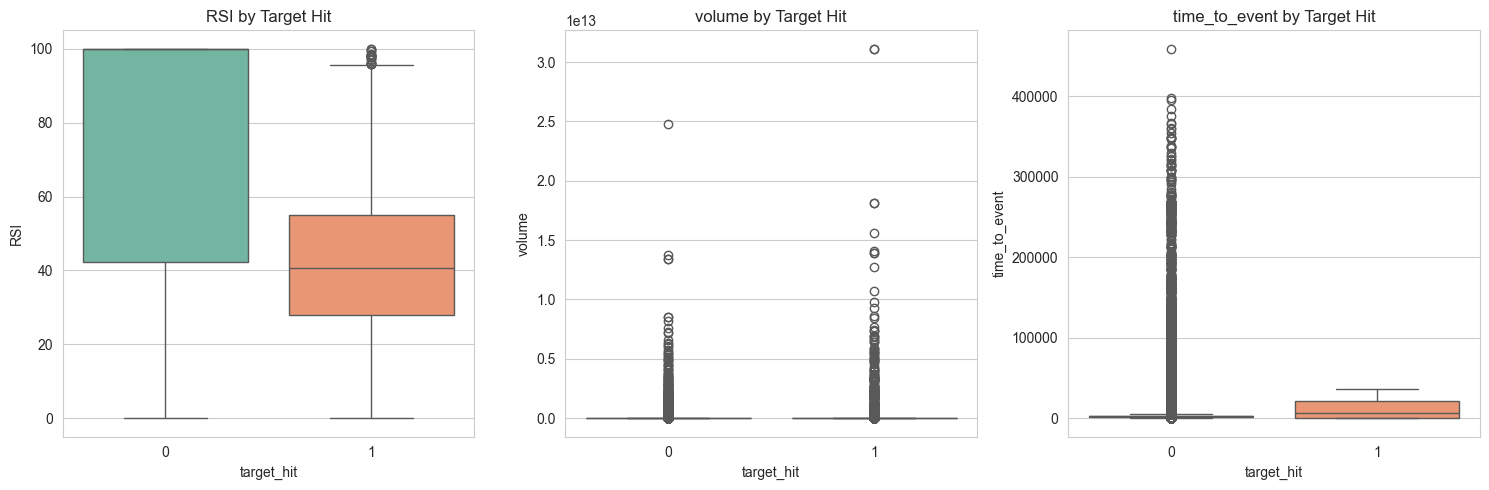

In [8]:
# 1. Boxplots: Compare Distribution of Key Features by Target Outcome
key_feats_for_boxplot = ['RSI', 'volume', 'time_to_event']
available_box_feats = [c for c in key_feats_for_boxplot if c in df.columns]

if 'target_hit' in df.columns and available_box_feats:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(available_box_feats):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(x='target_hit', y=col, data=df, palette='Set2')
        plt.title(f'{col} by Target Hit')
    plt.tight_layout()
    plt.show()

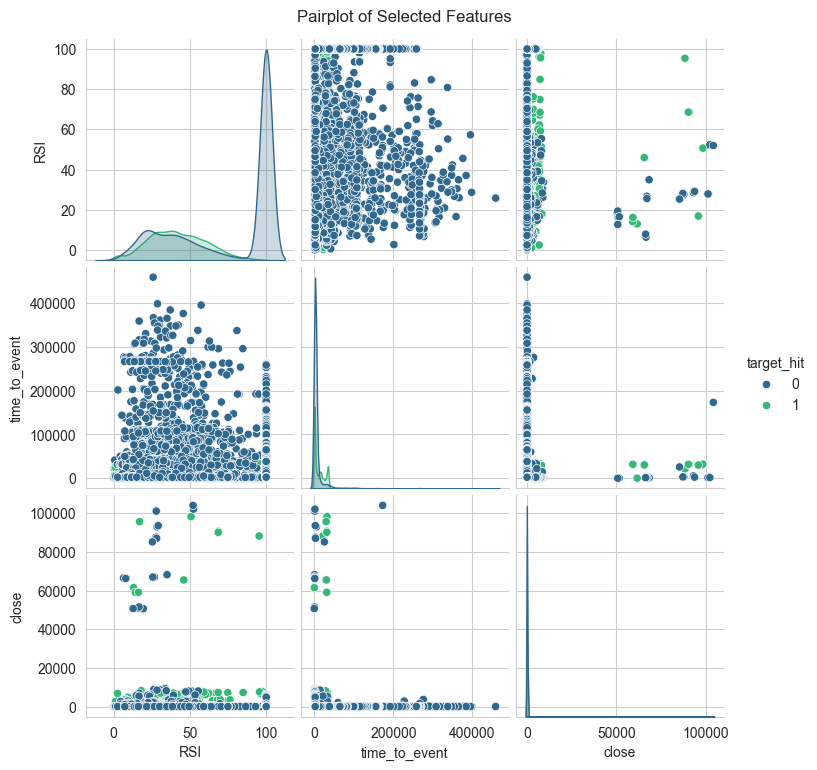

In [9]:
# 2. Pairplot (Subset)
# We strictly limit columns to avoid crashing the kernel with a huge plot
pairplot_cols = ['target_hit', 'RSI', 'time_to_event']
if 'close' in df.columns:
    pairplot_cols.append('close')

available_pair_cols = [c for c in pairplot_cols if c in df.columns]

if len(available_pair_cols) > 1:
    sns.pairplot(df[available_pair_cols], hue='target_hit' if 'target_hit' in available_pair_cols else None, 
                 palette='viridis', diag_kind='kde')
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.show()

### 💡 Insights: Visual Relationships
- **Feature Separation:** 
Boxplots show that RSI tends to be higher when target_hit = 0 and lower when target_hit = 1, indicating a potential reversal behavior that may encode meaningful buy/sell signals.
time_to_event is slightly longer for successful trades, suggesting that winning signals tend to materialize over a relatively longer time horizon.
volume contains clear outliers, but its direct impact on the target appears weak; applying a log transformation before modeling is recommended.

- **Clusters:** 
Pairplot analysis reveals mild clustering in the (RSI, time_to_event) space, indicating potential value in constructing interaction features (e.g., RSI × time-based features).
Feature values appear compressed within narrow ranges, further reinforcing the need for normalization or scaling in subsequent phases.

## Step 2.5: Insights Summary
Summary of findings from the EDA phase.

In [10]:
print("--- Auto-Generated Insights Summary ---")

# 1. Data Balance
if 'target_hit' in df.columns:
    target_counts = df['target_hit'].value_counts(normalize=True)
    print(f"🔹 Target Balance: The dataset has {target_counts.get(1, 0):.1%} positive samples (1) and {target_counts.get(0, 0):.1%} negative samples (0).")

# 2. Top Correlations
if 'target_hit' in numeric_df.columns:
    top_pos_corr = corr_target.head(3).index.tolist()
    top_neg_corr = corr_target.tail(3).index.tolist()
    print(f"🔹 Top Positive Correlations with Target: {top_pos_corr}")
    print(f"🔹 Top Negative Correlations with Target: {top_neg_corr}")

# 3. Outliers (using IQR method from previous step logic)
print("🔹 Feature Distributions: Check the histograms above for skewness. Features like 'volume' and 'time_to_event' often require log-transformation.")

print("\n📝 Note: Use these insights to guide Phase 3 (Feature Engineering). For example, if 'RSI' shows good separation in boxplots, prioritize it for interaction features.")

# --- 5. Summary Report Export (Logging for Phase 3) ---
insights_path = LOGS_DIR / "eda_insights_summary.txt"
if not insights_path.parent.exists():
    insights_path.parent.mkdir(parents=True, exist_ok=True)

with open(insights_path, "w") as f:
    f.write("=== AUTO-GENERATED EDA INSIGHTS ===\n\n")
    if 'target_hit' in df.columns:
        f.write(f"Target Balance:\n{target_counts.to_dict()}\n\n")
    if 'target_hit' in numeric_df.columns:
        f.write(f"Top Positive Corrs:\n{corr_target.head(5).to_dict()}\n")
        f.write(f"Top Negative Corrs:\n{corr_target.tail(5).to_dict()}\n")
    if 'high_skew' in locals() and not high_skew.empty:
        f.write(f"\nHighly Skewed Features:\n{list(high_skew.index)}\n")
        
print(f"✅ EDA Summary Report saved -> {insights_path}")

--- Auto-Generated Insights Summary ---
🔹 Target Balance: The dataset has 29.5% positive samples (1) and 70.5% negative samples (0).
🔹 Top Positive Correlations with Target: ['target_hit', 'sl3', 'sl5']
🔹 Top Negative Correlations with Target: ['RSI', 'id', 'TP18']
🔹 Feature Distributions: Check the histograms above for skewness. Features like 'volume' and 'time_to_event' often require log-transformation.

📝 Note: Use these insights to guide Phase 3 (Feature Engineering). For example, if 'RSI' shows good separation in boxplots, prioritize it for interaction features.
✅ EDA Summary Report saved -> E:\AI Trading Signal Prediction\AI-Trading-Signal-Prediction\logs\eda_insights_summary.txt
